<a href="https://colab.research.google.com/github/kariru-k/datascienceportfolio/blob/main/biodiversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com)

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

##  Import Relevant Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


## Load the Dataset

In order to observe the data first, we have to load the data into DataFrames using the pandas module

### Observations

In [3]:
observations = pd.read_csv("observations.csv")
observations.columns

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

In [4]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


Here we see that the observations dataset has three columns


*   **scientific_name** - The scientific name of each species
*   **park_name** - The name of the national park
*   **observations** - The number of observations for the species in the park the past seven days




### Species_info

In [5]:
species_info = pd.read_csv("species_info.csv")
species_info.columns

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

In [6]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


We see that the species_info dataset has 4 columns


*   category - The category of species
*   scientific_name - The scientific name of the species
*   common_names - The common names of the species
*   conservation_status - The conservation status of the species



## Data Characteristics

In [8]:
print(f"Observation dataset shape: {observations.shape}")
print(f"Species dataset shape: {species_info.shape}")

Observation dataset shape: (23296, 3)
Species dataset shape: (5824, 4)


Here we can see that the `Observation` dataset has 23296 rows and 3 columns while the `Species` dataset has 5824 rows and 4 columns

# Exploratory Data Analysis

## `species_info`

###Univariate Data Analysis

There will first be a check on the `species_info` dataset in order to comprehend the contents properly

#### `species_info.species`

There will be a check to find out the number of distinct species in the national parks


In [13]:
print(f"Number of unique species: {species_info.scientific_name.nunique()}")

Number of unique species: 5541


There are 5541 unique species in the dataset. This indicates that there are a lot of distinct species in the parks

#### `species_info.Category`

Next there will be a check on how many categories of species are there in total

In [14]:
print(f"Number of categories: {species_info.category.nunique()}")
print(f"Categories: {species_info.category.unique()}")

Number of categories: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


There are 7 categories of species including animals and plants. Next, a count of each category in the data

In [15]:
species_info.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Mammal'),
  Text(1, 0, 'Bird'),
  Text(2, 0, 'Reptile'),
  Text(3, 0, 'Amphibian'),
  Text(4, 0, 'Fish'),
  Text(5, 0, 'Vascular Plant'),
  Text(6, 0, 'Nonvascular Plant')])

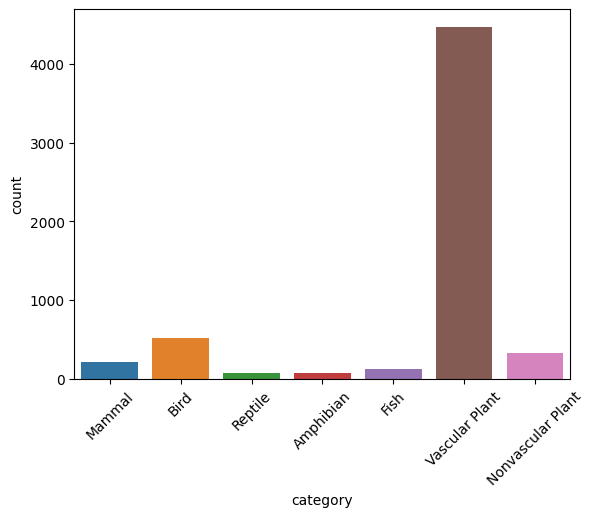

In [17]:
sns.countplot(x = "category", data = species_info)
plt.xticks(rotation = 45)

From the visualization above, It can be seen that the Vascular Plant category is by far the prevalent one, followed by the Bird category. Very few Reptiles, Amphibians and Fish were observed

#### `species_info.conservation_status`


Next, there will be a check on the conservation_status variable.
First, a check on the types of conservation statuses that are there

In [18]:
print(f"Conservation Status Number: {species_info.conservation_status.nunique()}")
print(f"Conservation Status Categories: {species_info.conservation_status.unique()}")

Conservation Status Number: 4
Conservation Status Categories: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


There are 4 Conservation Statuses present:


*   `Species of Concern`
*   `Endangered`
*   `Threatened`
*   `In Recovery`

The presence of `nan` values indicates that those species are not under any conservation status

Next, there will be a check on the count for each Conservation Status

In [19]:
species_info.groupby("conservation_status").size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Species of Concern'),
  Text(1, 0, 'Endangered'),
  Text(2, 0, 'Threatened'),
  Text(3, 0, 'In Recovery')])

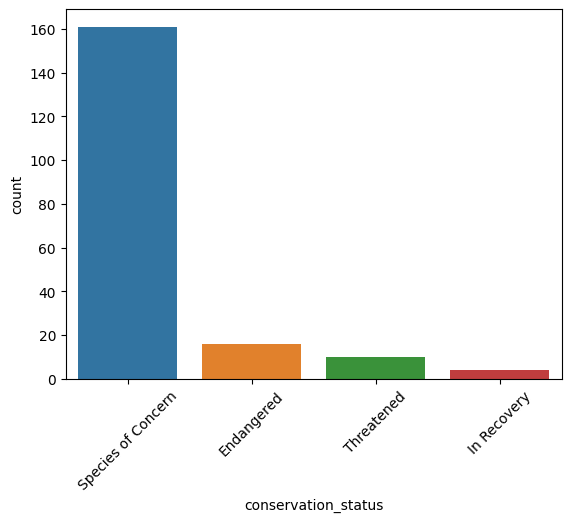

In [20]:
sns.countplot(x = "conservation_status", data = species_info)
plt.xticks(rotation = 45)

As can be seen from the visualization, there are 161 `Species of Concern`, 16 `Endangered` species, 10 `Threatened` species and 4 `In Recovery` species

### Multi-variate Data Analysis

Based on the columns in the dataset, the columns `conservation_status` and `category` can be analyzed together in order to see the conservation status details for each category. First, the `nan` values must be replaced with a more applicable category `Not Currently In Danger`

In [21]:
species_info = species_info.fillna(
    value = {
        "conservation_status": "Not Currently In Danger"
    }
)

In [22]:
species_info.groupby("conservation_status").size()

conservation_status
Endangered                   16
In Recovery                   4
Not Currently In Danger    5633
Species of Concern          161
Threatened                   10
dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Not Currently In Danger'),
  Text(1, 0, 'Species of Concern'),
  Text(2, 0, 'Endangered'),
  Text(3, 0, 'Threatened'),
  Text(4, 0, 'In Recovery')])

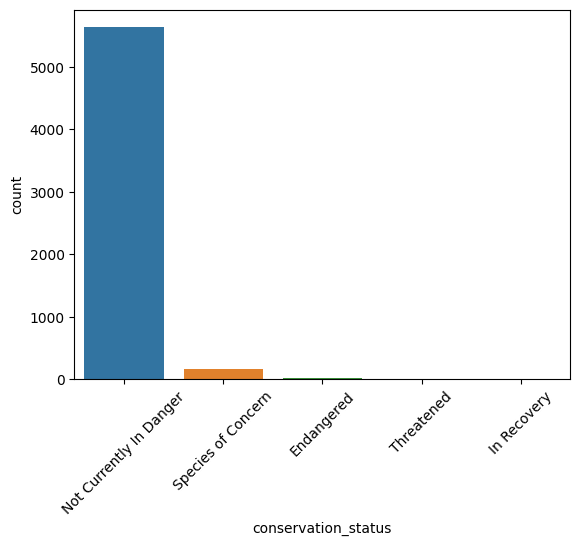

In [23]:
sns.countplot(x = "conservation_status", data = species_info)
plt.xticks(rotation = 45)

A crosstab can now be used to visualize the conservation statuses and how they relate to the categories

In [25]:
conservation_category = species_info[species_info.conservation_status != "Not Currently In Danger"]

status_category_freq = pd.crosstab(conservation_category.conservation_status, conservation_category.category)
status_category_freq

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1,4,3,7,0,0,1
In Recovery,0,3,0,1,0,0,0
Species of Concern,4,72,4,28,5,5,43
Threatened,2,0,4,2,0,0,2


The above table shows that mammals have the most endangered species while birds have the most species in concern. There are hardly any reptiles and plants with a conservation status. This can be seen in the following visualization

Text(0, 0.5, 'Number of Species')

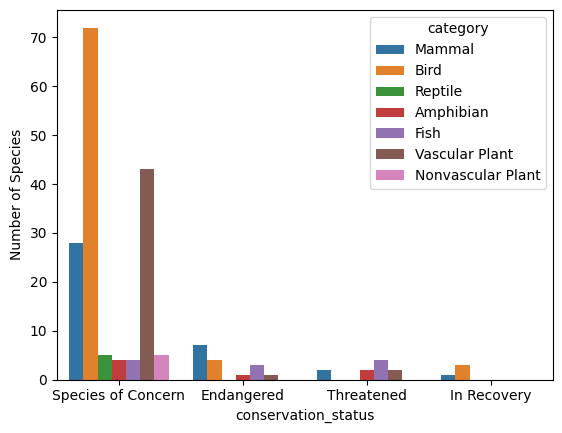

In [27]:
sns.countplot(data = conservation_category, x="conservation_status", hue="category")
plt.ylabel("Number of Species")

## `observations`

### Univariate Analysis

The `observations` dataset has 3 columns

#### `observations.scientific_names`

First, there will be a check for how many distinct species were observed 

In [28]:
print(f"Number of unique observed species: {observations.scientific_name.nunique()}")

Number of unique observed species: 5541


The number of unique observed species is 5541, which is the same number of species that were established in the `species_info` dataset

####`observations.park_name`

Next, there is a check for the number of parks in which observations were made

In [30]:
print(f"Number of parks where there were observed species: {observations.park_name.nunique()}")
print(f"Parks where there were observed species: {observations.park_name.unique()}")

Number of parks where there were observed species: 4
Parks where there were observed species: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


There were 4 parks in which there were observed species.

#### `observations.observations`

Here the task is to check the total number of observations  

In [31]:
print(f"Total Number of observations: {observations.observations.sum()}")

Total Number of observations: 3314739


There are 3314739 observations in total across 7 days

###  Multivariate Analysis

One task here is to check the number of observations per park

In [34]:
print(f"Number of Observations Per Park:{observations.groupby('park_name').observations.sum()}")

Number of Observations Per Park:park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Great Smoky Mountains National Park'),
  Text(1, 0, 'Yosemite National Park'),
  Text(2, 0, 'Bryce National Park'),
  Text(3, 0, 'Yellowstone National Park')])

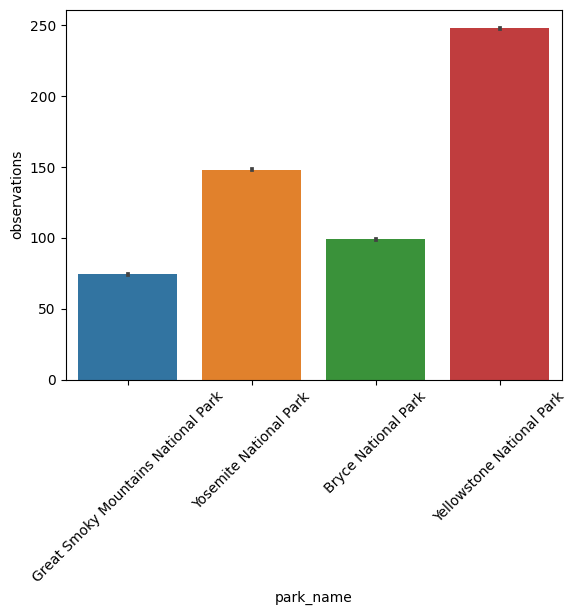

In [40]:
sns.barplot(data = observations, x = "park_name", y = "observations")
plt.xticks(rotation = 45)

# Further Analysis

In this sector, more analysis is done in order to see new observations in the data. 

## Are Certain Species more likely to be endangered?

Further analysis is done in order to establish whether certain species are more endangered compared to others.
First, a new column is created in order to check whether the species in question is protected(has a `conservation_status` or not)

In [41]:
species_info["is_protected"] = species_info.conservation_status != "Not Currently In Danger"

Next, by grouping the according to categories and their protected status, we can see how endangered each one is

In [45]:
category_counts = species_info.groupby(["category", "is_protected"]).scientific_name.nunique()\
                  .reset_index()\
                  .pivot(
                      columns = "is_protected",
                      index = "category",
                      values = "scientific_name"
                  ).reset_index()
category_counts.columns = ["categories", "not_protected", "protected"]
category_counts

,categories,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Here It can be seen that Vascular plants, birds and mammals have a higher number of species that are protected. However absolute numbers don't tell the difference hence it would be better to use percentage proportions

In [46]:
category_counts["percentage_protected"] = category_counts.protected * 100 \
                                          / (category_counts.protected + category_counts.not_protected)
category_counts

,categories,not_protected,protected,percentage_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


Using percentage proportions, it can be seen that mammals and birds have a higher proportion of their species being protected at 17% and 15% respectively

### Statistical Significance

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|30|146|
|Bird|75|413|

In [50]:
contingency1 = [[30, 146],
              [75, 413]]

chi2, pval, dof, expected = chi2_contingency(contingency1)
print(chi2)
print(pval)

0.1617014831654557
0.6875948096661336


The Chi-value is low and the p-value is above the significant threshhold of 0.05 which means that there is no significant relationship between mammals and birds. Thus the data is independent

Next statistical test is done between mammals and reptiles

In [52]:
contingency2 = [[30, 146],
               [5, 73]]
chi2, pval, dof, expected = chi2_contingency(contingency2)
print(chi2)
print(pval)

4.289183096203645
0.03835559022969898


Here the chi-value is relatively large compared to the size of the contingency table suggesting an association. The p-value is below the significant threshhold of 0.05 meaning that there seems to be an association between mammals and reptiles